<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_10_support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machines

A Support Vector Machine (**SVM**) is a very powerful and versatile Machine Learning
model, capable of performing 
* linear or nonlinear classification, 
* regression, 
* even outlier detection.

It is one of the most popular models in Machine Learning.
SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use Seaborn plotting defaults
import seaborn as sns
sns.set()

#Motivating Support Vector Machines

**SVMs: A New Generation of Learning Algorithms**
* Pre 1980:
  - Almost all learning methods learned linear decision surfaces.
  - Linear learning methods have nice theoretical properties
* 1980’s
  - Decision trees and NNs allowed efficient learning of nonlinear decision surfaces
  - Little theoretical basis and all suffer from local minima
* 1990’s
  - Efficient learning algorithms for non-linear functions based on computational learning theory developed
  - Nice theoretical properties.

**Key Ideas**
* Two independent developments within last decade
  - New efficient separability of non-linear regions that use "kernel functions": generalization of "similarity" to new kinds of similarity measures based on dot products
  - Use of quadratic optimization problem to avoid "local minimum" issues with neural nets
  - The resulting learning algorithm is an optimization algorithm rather than a greedy search

**Organization**
* Basic idea of support vector machines: just like 1-layer or multi-layer neural nets
  - Optimal hyperplane for linearly separable
patterns
  - Extend to patterns that are not linearly
separable by transformations of original data to
map into new space – the *Kernel* function
* SVM algorithm for pattern recognition

**SVM as linear classifier**

Consider classification function
$$
\text{class} = \text{sign}\left(\vec{x} \cdot \vec{w} + b\right),
$$
that yields $+1$ or $-1$ depending on class it supposes the $x$ belongs to.
$\vec{w}$ and $w_0$ are parameters obtained with training step.


**Support Vectors**
* Support vectors are the data points that lie closest to the decision surface (or hyperplane)
* They are the data points most difficult to classify
* They have direct bearing on the optimum location of the decision surface
* We can show that the optimal hyperplane stems
from the function class with the lowest
"capacity"= # of independent features/parameters
we can twiddle

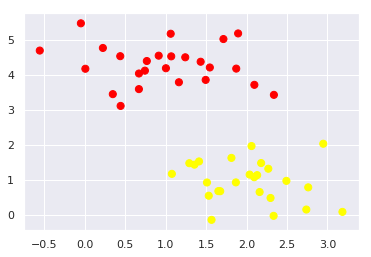

In [0]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

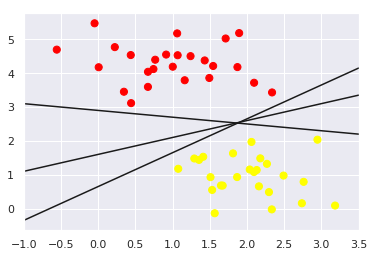

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

* In general, lots of possible solutions (an infinite number!)
* Support Vector Machine (SVM) finds an optimal solution

#Support Vector Machines: Maximizing the Margin

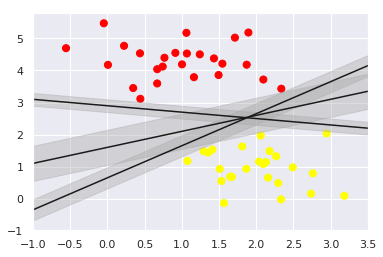

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

#Support vector machines are an example of a maximum margin estimator

* SVMs maximize the margin (Winston terminology: the ‘street’) around the separating hyperplane.
* The decision function is fully specified by a (usually very small) subset of training samples, the support vectors.
* This becomes a Quadratic programming problem that is easy to solve by standard methods

**Separation by Hyperplanes**
* Assume linear separability for now (we will relax this later)
* in 2 dimensions, can separate by a line
  - in higher dimensions, need hyperplanes

**General input/output for SVMs just like for
neural nets, but for one important addition...**

**Input:** set of (input, output) training pair samples; call the input sample features $x_1$, $x_2$, $\dots$, $x_n$, and the output result $y$.
Typically, there can be lots of input features $x_i$.

**Output:** set of weights $w$ (or $w_i$), one for each feature, whose linear combination predicts the value of $y$. (So far, just like neural nets...)

**Important difference:** we use the optimization of maximizing the margin ("street width") to reduce the number of weights
that are nonzero to just a few that correspond to the important features that "matter" in deciding the separating line(hyperplane)... these nonzero weights correspond to the
support vectors (because they "support" the separating hyperplane)

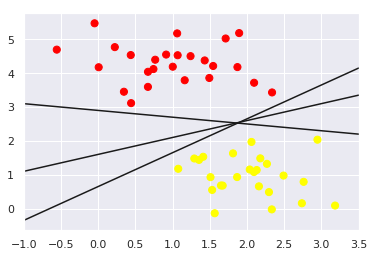

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

Find $a$, $b$, $c$, such that $ax + by \geq c$ for red points $ax + by \leq (or < ) c$ for yellow points.

**Which Hyperplane to pick?**
* Lots of possible solutions for $a$, $b$, $c$.
* Some methods find a separating hyperplane, but not the optimal one (e.g., neural net)
* But: Which points should influence optimality?
  - All points?
    * Linear regression
    * Neural nets
  - Or only "difficult points" close to decision boundary
    * Support vector machines

**Support Vectors again for linearly separable case**
* Support vectors are the elements of the training set that would change the position of the dividing hyperplane if removed.
* Support vectors are the critical elements of the training set
* The problem of finding the optimal hyper plane is an optimization problem and can be solved by optimization techniques (we use Lagrange multipliers to get this problem into a form that can be solved analytically).

**Support Vectors:** Input vectors that just touch the boundary of the margin (street) – circled below, there are 3 of them (or, rather, the ‘tips’ of the vectors)
$$
\vec{w} \cdot \vec{x}_\text{marginal} + b = +1
\quad \text{or} \quad
\vec{w} \cdot \vec{x}_\text{marginal} + b = -1
$$

**Why do we use $+1$ and $-1$?**
Recall linear classifier
$$
\text{class} = \text{sign}\left(\vec{x} \cdot \vec{w} + b\right)
$$
and note that nothing changes if we scale $\vec{w}$ and $b$ by the same amount.
As a result we are free to choose scale so that $\vec{w} \cdot \vec{x} + b = \pm 1$

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/support_points.png" width="500px" />



Here, we have shown the actual support vectors, $v_1$, $v_2$, $v_3$, instead of just the $3$ circled points at the tail ends of the support vectors. $d$ denotes $1/2$ of the street "width"

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/support_vectors.png" width="500px" />



Define the hyperplanes $H$ such that:
$$
\begin{aligned}
\vec{w} \cdot \vec{x}_i + b\geq +1 
\quad\text{when}\quad 
y_i = +1\\
\vec{w} \cdot \vec{x}_i + b\leq -1 
\quad\text{when}\quad 
y_i = -1
\end{aligned}
$$
$H_1$ and $H_2$ are the planes
$$
\begin{aligned}
H_1:\quad \vec{w} \cdot \vec{x}_i + b = +1\\
H_1:\quad \vec{w} \cdot \vec{x}_i + b = -1\\
\end{aligned}
$$
The points on the planes $H_1$ and $H_2$ are the tips of the *Support Vectors*.

The plane $H_0$ is the median inbetween, where $\vec{w} \cdot \vec{x}_i + b = 0$

* $d^+$ -- the shortest distance to the closest positive point
* $d^-$ -- the shortest distance to the closest negative point
The margin (gutter) of a separating hyperplane is $d^+ + d^-$.

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/hyperplanes.png" width="600px" />



Moving a support vector moves the decision boundary | Moving the other vectors has no effect
---|---
![support vectors](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/move_support_vector.png) | ![support vectors](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/move_other_vector.png)

The optimization algorithm to generate the weights proceeds in such a way that only the support vectors determine the weights and thus the boundary

**Defining the separating Hyperplane**
* Form of equation defining the decision surface separating the classes is a hyperplane of the form:
$$
\vec{w} \cdot \vec{x} + b = 0
$$
   - w is a weight vector
   - x is input vector
   - b is bias
* Allows us to write
$$
\begin{aligned}
\vec{w} \cdot \vec{x} + b \geq 0
\quad\text{for}\quad
d_i = +1\\
\vec{w} \cdot \vec{x} + b < 0
\quad\text{for}\quad
d_i = -1\\
\end{aligned}
$$

**Some final definitions**
* Margin of Separation ($d$): the separation between the hyperplane and the closest data point for a given weight vector $\vec{w}$ and bias $b$.
* Optimal Hyperplane (maximal margin): the particular hyperplane for which the margin of separation $d$ is maximized.

**Maximizing the margin (aka street width)**

We want a classifier (linear separator)  with as big a margin as possible.

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/hyperplanes.png" width="600px" />

<br>

Recall the distance from a point $\vec{x}_0$ to a line $\vec{w}\cdot\vec{x}+b = 0$ is 
$$
\frac{|\vec{w}\cdot\vec{x}+b|}{||\vec{w}||}
$$
The distance between $H_0$ and $H_1$ is then
$$
\frac{|\vec{w}\cdot\vec{x}+b|}{||\vec{w}||} = \frac{1}{||w||}
$$
The total distance between $H_1$ and $H_2$ is thus 
$$
\frac{2}{||w||}
$$
In order to maximize the margin, we thus need to minimize $||w||$. With the
condition that there are no datapoints between $H_1$ and $H_2$
$$
\begin{aligned}
\vec{x}_i \cdot \vec{w} + b \geq +1
\quad\text{when}\quad
y_i = +1\\
\vec{x}_i \cdot \vec{w} + b \leq -1
\quad\text{when}\quad
y_i = -1\\
\end{aligned}
$$
Can be combined into
$$
y_i \left(\vec{x}_i \cdot \vec{w} + b\right) \geq +1
$$

**We now must solve a quadratic programming problem**

Problem is to minimize $||w||$, such that discrimination boundary is obeyed, i.e. $\min f(x)$ and $g(x)=0$, which we can rewrite as
$$
\min \frac{1}{2} ||\vec{w}||^2
$$
(Note this is a quadratic function)
$$
y_i \left(\vec{x}_i \cdot \vec{w} + b\right) - 1 = 0
$$
This is a constrained optimization problem. It can be solved by the Lagrangian multiplier method. Because it is quadratic, the surface is a paraboloid, with just a
single global minimum (thus avoiding a problem we had with neural nets!)

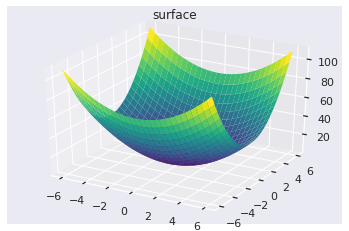

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

def f(x, y):
  return 2.0 + x**2 + 2.0 * y**2

_x = np.linspace(-6, 6, 30)
_y = np.linspace(-6, 6, 30)
_X, _Y = np.meshgrid(_x, _y)
_Z = f(_X, _Y)

ax = plt.axes(projection='3d')
ax.plot_surface(_X, _Y, _Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

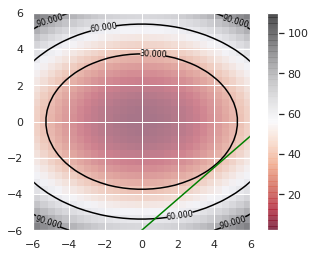

In [0]:
contours = plt.contour(_X, _Y, _Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(_Z, extent=[-6, 6, -6, 6], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();
plt.plot([0, 6], [-6, -0.8], '-k', color='green');

##Fitting a support vector machine

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a two-dimensional SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)
  # plot decision boundary and margins
  ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

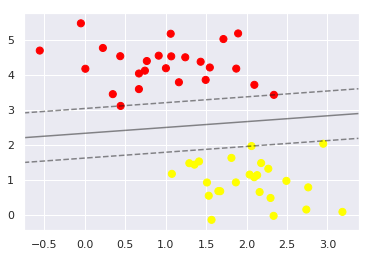

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# lines pass through support vectors
# any points further from the margin that are on the correct side do not modify the fit

In [0]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Text(0.5, 1.0, 'N = 120')

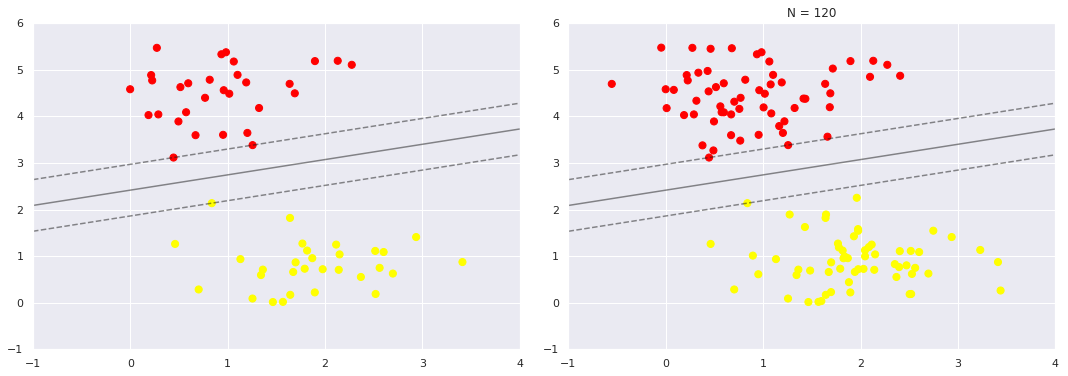

In [0]:
def plot_svm(N=10, ax=None):
  X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)
  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)
  
  
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
  plot_svm(N, axi)
axi.set_title('N = {0}'.format(N))

# In the right panel, we have doubled the number of training points, but the model has not changed

In [0]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

##Tuning the SVM: Softening margins

**What if the data is not separable?**

Consider the problem when data cannot be separated with a hyperplane due to outliers.
What ideas may help us?

* We cannot demand 
$$
y_i \left(\vec{x}_i \cdot \vec{w} + b\right) - 1 \geq 0
$$
for all $i$, thus the constraint should be relaxed.
Let's use "relaxation" $\xi_i > 0$
$$
\xi_i + y_i \left(\vec{x}_i \cdot \vec{w} + b\right) - 1 \geq 0.
$$
* But now we need to incorporate into the minimization problem the idea "we want as much $\xi_i = 0$ as possible". This means that a small number of features violates margin.

**How to make coefficients sparse?**

* $L_1$ regularization to the resque!
$$
\min\left( \frac{1}{2} ||\vec{w}||^2 + C \sum_i |\xi_i| \right)
$$
* Conditions remain
$$
|\xi_i| + y_i \left(\vec{x}_i \cdot \vec{w} + b\right) - 1 \geq 0.
$$

**What do we solve now?**

* The primary problem looks like
$$
\mathscr{L} = \sup_{\lambda_i \geq 0, \eta_i \geq 0}\left(
\underbrace{
    \frac{1}{2} ||\vec{w}||^2 + C \sum_i \xi_i
}_{\text{original function}}
- 
\underbrace{
  \sum_i \lambda_i [\xi_i + y_i \left(\vec{x}_i \cdot \vec{w} + b\right) - 1]
}_{\text{do not cross margin}}
- 
\underbrace{
  \sum_i \eta_i \xi_i
}_{\text{avoid abs}}
\right)
\rightarrow
\inf_{\omega, b, \xi}
$$
* $\lambda_i = 0$ -- peripheral (non-informative) objects
* $0 < \lambda_i < C$ -- marginal support vectors
* $\lambda_i = C$ -- support vectors violating borderline

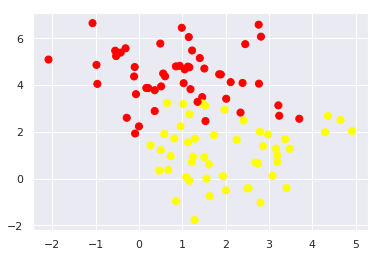

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

# Problem: data overlaps, no "hard" margin

The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called **soft margin classification**.

You can control this balance using the C hyperparameter: a smaller $C$ value leads to a wider street but more margin violations.

* If your SVM model is overfitting, you can try regularizing it by
reducing $C$.

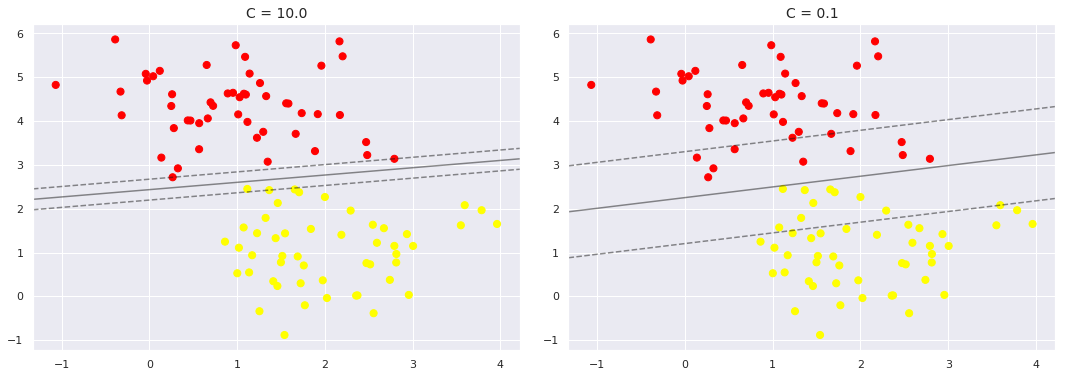

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
import numpy as np

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C).fit(X, y)
  axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  plot_svc_decision_function(model, axi)
  axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
  axi.set_title('C = {0:.1f}'.format(C), size=14)
  
# the optimal value of the C parameter will depend on your dataset
# should be tuned via cross-validation or a similar procedure

##Beyond linear boundaries: Kernel SVM

**Why do we need to transfer to dual problem?**

* Common step is change our primal problem to dual. But the primal problem was quite easy already, than why do we exchange it to potentially more complex problem?
* This step is hard to justify until you see the result.

**Transferring to dual problem**

* Change order of $\sup$ and $\inf$
$$
\inf_{\vec{w}, b} \mathscr{L} = \inf_{\vec{w}, b, \xi_i}\quad\sup_{\lambda_i \geq 0 , \eta_i \geq 0 } (\cdots)
\rightarrow
\sup_{\lambda_i \geq 0 , \eta_i \geq 0 } \mathscr{L}^* = \sup_{\lambda_i \geq 0 , \eta_i \geq 0 }\quad\inf_{\vec{w}, b,\xi_i} (\cdots)
$$
* Find $\vec{w}$ and $b$ solving
$$
\frac{\partial}{\partial w^{(k)}} (\cdots) = 0,
\quad
\frac{\partial}{\partial b} (\cdots) = 0,
\quad
\frac{\partial}{\partial \xi_k} (\cdots) = 0.
$$
* Obtain
$$
\vec{w} = \sum_{j} \lambda_j y_j \vec{x}_j,
\quad
\sum_{j} \lambda_j y_j = 0,
\quad
\lambda_i + \eta_i = C.
$$
* Substitute
$$
\mathscr{L}^* = 
\sum_{i} \lambda_i
- \frac{1}{2} \sum_{i,j} \lambda_i \lambda_j y_i y_j (\vec{x}_i \cdot \vec{x}_j)
$$

**What did we get?**
* Expression is a bit simpler (good but not crucial)
* Only scalar products of $(\vec{x}_i \cdot \vec{x}_j)$ are present (crucial).

The claim is that this function will be maximized if we give nonzero values to $\lambda$'s that correspond to the support vectors, i.e., those that "matter" in fixing the maximum width margin ("street").
Well, consider what this looks like.
Note first from the constraint condition that all the $\lambda$'s are positive.
Now let's think about a few cases.

* **Case 1.** If two features $\vec{x}_i$, $\vec{x}_j$ are completely dissimilar, their dot product is 0, and they don't contribute to $\mathscr{L}^*$.
* **Case 2.** If two features $\vec{x}_i$, $\vec{x}_j$ are completely alike, their dot product differs from 0.
There are 2 subcases.
   - **Subcase 1:** both $\vec{x}_i$ and $\vec{x}_j$ predict the same output value $y_i$ (either $+1$ or $-1$).
   Then $y_i y_j$ is always $+1$, and the value of $\lambda_i \lambda_j y_i y_j (\vec{x}_i \cdot \vec{x}_j)$ will be positive.
   But this would decrease the value of $\mathscr{L}^*$ (since it would subtract from the first term sum).
   So, the algorithm downgrades similar feature vectors that make the same prediction.
   - **Subcase 2:** $\vec{x}_i$ and $\vec{x}_j$ make opposite predictions about the output value $y_i$ and $y_j$ (i.e., one is $+1$, the other $-1$), but are otherwise very closely similar: then the product $\lambda_i \lambda_j y_i y_j (\vec{x}_i \cdot \vec{x}_j)$ is negative and we are subtracting it, so this adds to the sum, maximizing it.
   This is precisely the examples we are looking for: the critical ones that tell the two classes apart.

Dissimilar, (almost) orthogonal features | Similar, same class | Similar, different classes
---|---|---
![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/dissimilar_vectors.png) | ![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/similar_vectors_same_class.png) | ![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/similar_vectors_different_classes.png)

**Here comes the kernel!**
* We saw that result depends on scalar products only
* Why don't we first map $\vec{x}$ to some other linear space and only than calculate the scalar product?

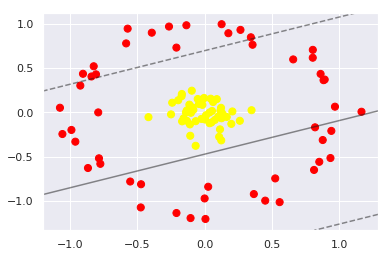

In [0]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [0]:
enable_plotly_in_cell()
import plotly.offline as py
import plotly.graph_objs as go

import numpy as np

#from sklearn.datasets.samples_generator import make_circles
#X, y = make_circles(100, factor=.1, noise=.1)

# a radial basis function in adition to the existing ones
r = np.exp(-(X ** 2).sum(1))

trace1 = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=r,
    mode='markers',
    marker=dict(
        size=12,
        color=y,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

*  radial basis centering matters -- no good results if chosen wrongly
*  try every possible centering solves the problem but computationally "no good"
*  kernel trick saves the day, see  [Wikipedia on kernel trick](https://en.wikipedia.org/wiki/Kernel_method)

In [0]:
clf = SVC(kernel='rbf', C=1E6, gamma='auto')
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

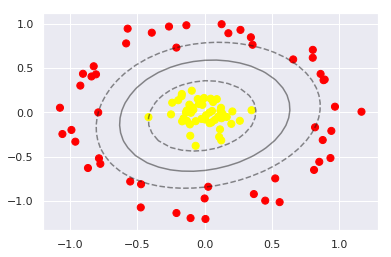

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

**Examples**

Kernel $K$$(\vec{x},$$\vec{y})$ | Name
---|---
$$(\vec{x}\cdot\vec{y})^2$$ | Quadratic
$$(\vec{x}\cdot\vec{y})^n$$ | Polynomial with monoms order $n$
$$(\vec{x}\cdot\vec{y} + 1)^n$$ | Polynomial with monoms order $\leq n$
$$\tanh(k_1(\vec{x}\cdot\vec{y}) + 1)^n$$ | NN with sigmoidal activation functions (works for certain $k_1$ and $k_2$ only)
$$e^{-\gamma ||\vec{x} - \vec{y}||^2}$$ | RBF (note this one!)


**How to generate new kernels**

Kernel $K$$(\vec{x},$$\vec{y})$ | Conditions
---|---
$$(\vec{x}\cdot\vec{y})$$ | 
$$1$$ | 
$$K_1(\vec{x},\vec{y})K_2(\vec{x},\vec{y})$$ | $K_1$ and $K_2$ are kernels
$$\alpha_1 K_1(\vec{x},\vec{y}) + \alpha_2 K_2(\vec{x},\vec{y})$$ | $K_1$ and $K_2$ are kernels, $\alpha_1 > 0$ and $\alpha_2 > 0$
$$\psi(\vec{x})\psi(\vec{y})$$ | $\psi: X \rightarrow \mathbb{R}$
$$K(\phi(\vec{x}),\phi(\vec{y}))$$ | $K$ is kernel and $\phi: X \rightarrow X$
$$\int\limits_X s(\vec{x}, \vec{z}) s(\vec{y}, \vec{z}) d\vec{z}$$ | $s: X\times X \rightarrow \mathbb{R}$ -- symmetric and integrable
$$f(K(\vec{x},\vec{y}))$$ | $K$ is a kernel and $f: \mathbb{R} \rightarrow \mathbb{R}$ can be represented as converging polynomial series with positive coefficient


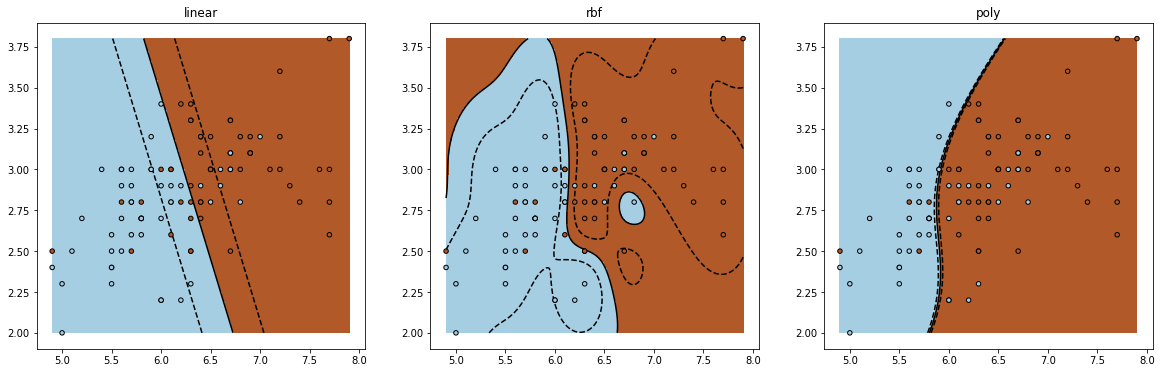

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# fit the model
for kernel, ax in [('linear', ax1), ('rbf', ax2), ('poly', ax3)]:
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    ax.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    ax.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    ax.set_title(kernel)
plt.show()

**Sequential minimal optimization (SMO) Algorithm (Послідовна мінімальна оптимізація)**

A soft-margin support vector machine is trained by solving a quadratic programming problem, which is expressed in the dual form as follows:

$$
\max_{\lambda} \sum_{i=1}^n \lambda_i - \frac12 \sum_{i=1}^n \sum_{j=1}^n y_i y_j K(x_i, x_j) \lambda_i \lambda_j,
$$
subject to:
$$
0 \leq \lambda_i \leq C, \quad \mbox{ for } i=1, 2, \ldots, n,
$$
$$
\sum_{i=1}^n y_i \lambda_i = 0
$$

where $C$ is an SVM hyperparameter and $K(x_i, x_j)$ is the kernel function, both supplied by the user; and the variables $\lambda_i$ are Lagrange multipliers.

SMO is an iterative algorithm for solving the optimization problem described above. SMO breaks this problem into a series of smallest possible sub-problems, which are then solved analytically. Because of the linear equality constraint involving the Lagrange multipliers $\alpha_i$, the smallest possible problem involves two such multipliers. Then, for any two multipliers $\lambda_1$ and $\lambda_2$, the constraints are reduced to:

$$
0 \leq \lambda_1, \lambda_2 \leq C,
$$
$$
y_1 \lambda_1 + y_2 \lambda_2 = k,
$$

and this reduced problem can be solved analytically: one needs to find a minimum of a one-dimensional quadratic function. $k$ is the negative of the sum over the rest of terms in the equality constraint, which is fixed in each iteration.

The algorithm proceeds as follows:

1. Find a Lagrange multiplier $\lambda_1$ that violates the Karush–Kuhn–Tucker conditions for the optimization problem.
2. Pick a second multiplier $\lambda_2$ and optimize the pair $(\lambda_1,\lambda_2)$.
3. Repeat steps 1 and 2 until convergence.

When all the Lagrange multipliers satisfy the KKT conditions (within a user-defined tolerance), the problem has been solved. Although this algorithm is guaranteed to converge, heuristics are used to choose the pair of multipliers so as to accelerate the rate of convergence. This is critical  for large data sets since there are $n(n-1)/2$ possible choices for $\lambda_i$ and $\lambda_j$.

##Notable modifications

**Overfitting by SVM (sometimes happens)**
* Too much points are support vectors (too much freedom to bend to fit the training data) -- no generalization.
* SVMs have an 'automatic' way to avoid such issues (see the book by Vapnik, 1995 for more details). 
* Short description: We add a penalty function for mistakes made after training. Overfitted SMV tends to make errors on new data and they can be incorporated into the quadratic programming problem.

**Making SVM better (or not)**

* LASSO SVM
* Doubly Regularized SVM (Elastic Net SVM)
* Support Features Machine (SFM)
* Relevance Features Machine (RFM)
* RVM (Relevance Vector Machine)

**SVM regression**

As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support linear and non-linear classification, but it also supports linear and non-linear regression.
The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations (i.e. instances off the street).
The width of the street is controlled by a hyperparameter $\epsilon$.

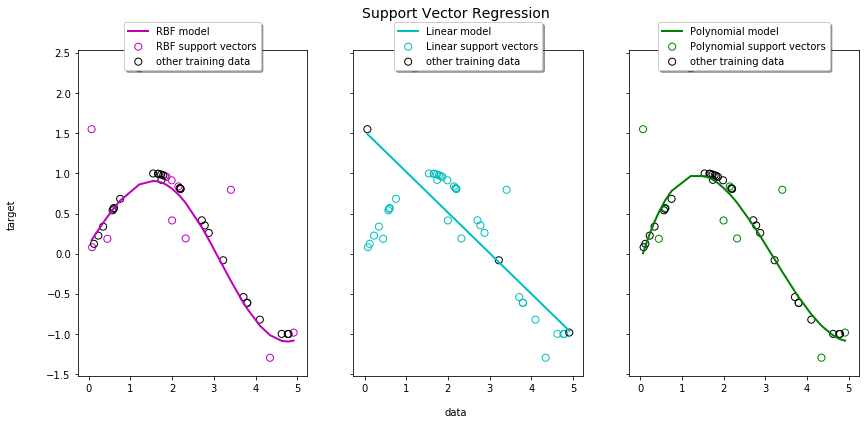

In [0]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

**Many classes SVM**

* Typically used 1 vs all approach has its problems (see figure)
* The problem is sometimes addressed by making predictions for new inputs $\vec{x}$ using $y(\vec{x}) = \max(y_k(\vec{x}))$. Unfortunately, this heuristic approach suffers from the problem that the different classifiers were trained on different tasks, and there is no guarantee that the real-valued quantities $y_k(\vec{x})$ for different classifiers will have appropriate scales.
* Another problem with the one-versus-the-rest approach is that the training sets are imbalanced. For instance, if we have ten classes each with equal numbers of training data points, then the individual classifiers are trained on data sets comprising 90% negative examples and only 10% positive examples, and the symmetry of the original problem is lost. A variant of the one-versus-the-rest scheme was proposed by Lee et al. (2001) who modify the target values so that the positive class has target +1 and the negative class has target $-1/(K − 1)$.
* Weston and Watkins (1999) define a single objective function for training all
$K$ SVMs simultaneously, based on maximizing the margin from each to remaining
classes. However, this can result in much slower training because, instead of solving $K$ separate optimization problems each over $N$ data points with an overall cost of $O(KN^2)$, a single optimization problem of size $(K −1)N$ must be solved giving an overall cost of $O(K^2N^2)$.
  - The latter problem can be alleviated by organizing the pairwise classifiers into a directed acyclic graph (not to be confused with a probabilistic graphical model) leading to the DAGSVM (Platt et al., 2000). For $K$ classes, the DAGSVM has a total of $K(K − 1)/2$ classifiers, and to classify a new test point only $K - 1$ pairwise classifiers need to be evaluated, with the particular classifiers used depending on which path through the graph is traversed.
* A different approach to multiclass classification, based on error-correcting output codes, was developed by Dietterich and Bakiri (1995) and applied to support vector machines by Allwein et al. (2000). This can be viewed as a generalization of the voting scheme of the one-versus-one approach in which more general partitions of the classes are used to train the individual classifiers. The $K$ classes themselves are represented as particular sets of responses from the two-class classifiers chosen, and together with a suitable decoding scheme, this gives robustness to errors and to ambiguity in the outputs of the individual classifiers. Although the application of SVMs to multiclass classification problems remains an open issue, in practice the
one-versus-the-rest approach is the most widely used in spite of its ad-hoc formulation and its practical limitations.
* There are also single-class support vector machines, which solve an unsupervised learning problem related to probability density estimation. Instead of modeling the density of data, however, these methods aim to find a smooth boundary enclosing a region of high density. The boundary is chosen to represent a quantile of the density, that is, the probability that a data point drawn from the distribution will land inside that region is given by a fixed number between 0 and 1 that is specified in advance. This is a more restricted problem than estimating the full density but may be sufficient in specific applications. Two approaches to this problem using support vector machines have been proposed. The algorithm of Scholkopf et al. (2001) tries to find a hyperplane that separates all but a fixed fraction $\nu$ of the training data from the origin while at the same time maximizing the distance (margin) of the hyperplane from the origin, while Tax and Duin (1999) look for the smallest sphere in feature space that contains all but a fraction $\nu$ of the data points.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_10_support_vector_machines/one_vs_all_classification.png)

#Example: Face Recognition

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


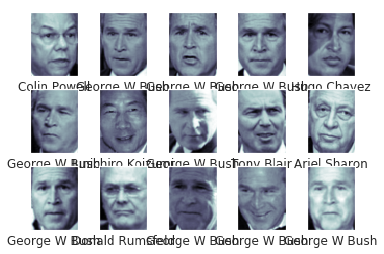

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
  
# see a sample of dataset

In [0]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42, svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# use PCA to extract features
# we will learn what is PCA later

In [0]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=3)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

# be careful if parameters fall towards edges
# it better be the case parmeters closer to the center of the grid

CPU times: user 36.8 s, sys: 10.6 s, total: 47.4 s
Wall time: 27.3 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

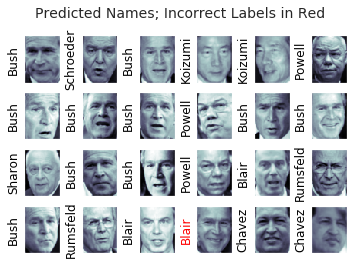

In [0]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [0]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



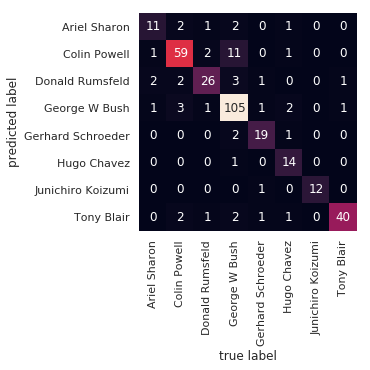

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#Support Vector Machine Summary

**Advantages**

*   Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
*   Once the model is trained, the prediction phase is very fast.
*   Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
*   Their integration with kernel methods makes them very versatile, able to adapt to many types of data.



**Disadvantages**


*   The scaling with the number of samples $N$ is $O(N^3)$ at worst, or $O(N^2)$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
*   The results are strongly dependent on a suitable choice for the softening parameter C . This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
*   The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the probability parameter of SVC ), but this extra estimation is costly.

